In [ ]:
# Function to perform TF-IDF vectorization and keyword extraction
def extract_keywords(df_data):
    # Apply text preprocessing to 'content' column
    df_data['clean_content'] = df_data['content'].apply(preprocess_text)
    
    # Perform TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_data['clean_content'])

    # Get feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Create a DataFrame from TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    # Identify top keywords
    top_keywords = tfidf_df.sum().sort_values(ascending=False).head(10)
    return top_keywords


# Sample data preprocessing and keyword extraction
top_keywords = extract_keywords(df_data)

# Display top keywords
print("Top Keywords:", top_keywords)

In [ ]:
preprocessed_title = df_data['title'].apply(preprocess_text)
preprocessed_body = df_data['content'].apply(preprocess_text)

# TF-IDF Vectorization for title and body separately
tfidf_vectorizer_title = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix_title = tfidf_vectorizer_title.fit_transform(preprocessed_title)

tfidf_vectorizer_body = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix_body = tfidf_vectorizer_body.fit_transform(preprocessed_body)

# Keyword Identification
keywords_title = tfidf_vectorizer_title.get_feature_names_out()
keywords_body = tfidf_vectorizer_body.get_feature_names_out()

# Calculate cosine similarity between title and body TF-IDF matrices
cosine_similarities = cosine_similarity(tfidf_matrix_title, tfidf_matrix_body)

# Print cosine similarities for each article
for i, similarity_score in enumerate(cosine_similarities):
    print(f"Article {i+1} - Cosine Similarity: {similarity_score}")

: 

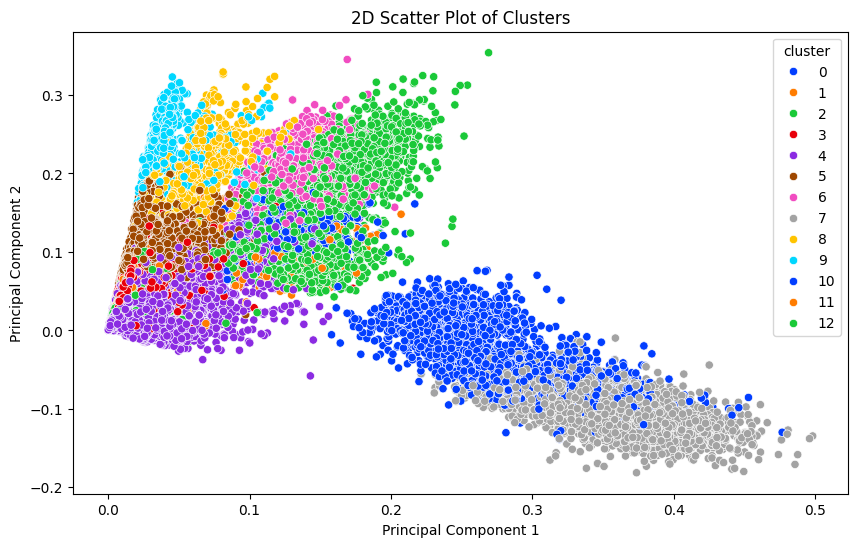

In [ ]:
# Define sparse TF-IDF matrix
sparse_tfidf_matrix = csr_matrix(tfidf_matrix)

# Dimensionality Reduction for Visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_features = svd.fit_transform(sparse_tfidf_matrix)

# Visualize the Clusters
df_visualize = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
df_visualize['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_visualize, x='PC1', y='PC2', hue='cluster', palette='bright', legend='full')
plt.title('2D Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
